In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/google_stock/GOOGL.csv', index_col= 'Date', parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [4]:
len(df)

4041

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4041 entries, 2004-08-19 to 2020-09-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4041 non-null   float64
 1   High       4041 non-null   float64
 2   Low        4041 non-null   float64
 3   Close      4041 non-null   float64
 4   Adj Close  4041 non-null   float64
 5   Volume     4041 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 221.0 KB


In [6]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df['last_close'] = df['Close'].shift(1)

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close
Date,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000,NaN
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,50.220219
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,54.209209
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,54.754753
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,52.487488


In [9]:
df['return'] = (df['Close'] - df['last_close']) / df['last_close']

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,return
Date,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000,NaN,NaN
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,50.220219,0.079430
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,54.209209,0.010064
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,54.754753,-0.041408
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,52.487488,0.010775


In [11]:
df = df[1:]

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,return
Date,,,,,,,,
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,50.220219,0.079430
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,54.209209,0.010064
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,54.754753,-0.041408
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,52.487488,0.010775
2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094800,53.053055,0.018019


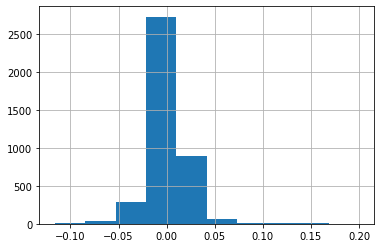

In [13]:
df['return'].hist()

In [14]:
df['Return'] = df['return']>0

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,return,Return
Date,,,,,,,,,
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,50.220219,0.079430,True
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,54.209209,0.010064,True
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,54.754753,-0.041408,False
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,52.487488,0.010775,True
2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094800,53.053055,0.018019,True


In [16]:
df.Return.replace({True : 1, False : 0}, inplace=True)

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,return,Return
Date,,,,,,,,,
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,50.220219,0.079430,1
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,54.209209,0.010064,1
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,54.754753,-0.041408,0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,52.487488,0.010775,1
2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094800,53.053055,0.018019,1


In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'last_close',
       'return', 'Return'],
      dtype='object')

In [19]:
df.drop(['Adj Close', 'last_close', 'return'], axis=1, inplace=True)

In [20]:
df.head()

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2004-08-20,50.555557,54.594593,50.300301,54.209209,22834300,1
2004-08-23,55.430431,56.796795,54.579578,54.754753,18256100,1
2004-08-24,55.675674,55.855854,51.836838,52.487488,15247300,0
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188600,1
2004-08-26,52.527527,54.029030,52.382381,54.009010,7094800,1


## **train test split**

In [21]:
test_size = 172

In [22]:
test_ind = len(df)- test_size

In [23]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [24]:
train.head()

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2004-08-20,50.555557,54.594593,50.300301,54.209209,22834300,1
2004-08-23,55.430431,56.796795,54.579578,54.754753,18256100,1
2004-08-24,55.675674,55.855854,51.836838,52.487488,15247300,0
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188600,1
2004-08-26,52.527527,54.029030,52.382381,54.009010,7094800,1


In [25]:
test.head()

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1363900,1
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1170400,0
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,2338400,1
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1716500,0
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1765700,1


In [26]:
x_train = train[['Open', 'High', 'Low', 'Close', 'Volume']].values
y_train = train['Return'].values

In [27]:
x_test = test[['Open', 'High', 'Low', 'Close', 'Volume']].values
y_test = test['Return'].values

In [28]:
x_train

array([[5.05555570e+01, 5.45945930e+01, 5.03003010e+01, 5.42092090e+01,
        2.28343000e+07],
       [5.54304310e+01, 5.67967950e+01, 5.45795780e+01, 5.47547530e+01,
        1.82561000e+07],
       [5.56756740e+01, 5.58558540e+01, 5.18368380e+01, 5.24874880e+01,
        1.52473000e+07],
       ...,
       [1.36400000e+03, 1.36705005e+03, 1.35300000e+03, 1.35464001e+03,
        1.16060000e+06],
       [1.35681006e+03, 1.35700000e+03, 1.33783997e+03, 1.33970996e+03,
        9.99700000e+05],
       [1.33579004e+03, 1.34066003e+03, 1.33213000e+03, 1.33939001e+03,
        9.75700000e+05]])

In [29]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [30]:
x_test

array([[1.34841003e+03, 1.36868005e+03, 1.34648999e+03, 1.36868005e+03,
        1.36390000e+06],
       [1.34800000e+03, 1.37375000e+03, 1.34731995e+03, 1.36152002e+03,
        1.17040000e+06],
       [1.35163000e+03, 1.39831995e+03, 1.35100000e+03, 1.39781006e+03,
        2.33840000e+06],
       [1.40045996e+03, 1.40350000e+03, 1.39156006e+03, 1.39510999e+03,
        1.71650000e+06],
       [1.39481995e+03, 1.41184998e+03, 1.39263000e+03, 1.40504004e+03,
        1.76570000e+06],
       [1.42193005e+03, 1.42868005e+03, 1.41020996e+03, 1.41979004e+03,
        1.66000000e+06],
       [1.42946997e+03, 1.43493994e+03, 1.41959998e+03, 1.42895996e+03,
        1.31290000e+06],
       [1.43525000e+03, 1.44147998e+03, 1.42537000e+03, 1.44003003e+03,
        1.53650000e+06],
       [1.44000000e+03, 1.44263000e+03, 1.42777002e+03, 1.43058997e+03,
        1.30380000e+06],
       [1.43302002e+03, 1.44078003e+03, 1.43166003e+03, 1.43919995e+03,
        1.07750000e+06],
       [1.44544995e+03, 1.4506

In [31]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

## **Scaling of Train and Test Data**

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **Time series Generator**

In [35]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [36]:
length = 10

In [37]:
generator = TimeseriesGenerator(x_train, y_train, length = length, batch_size = 32)

In [38]:
x_train.shape[1]

5

## **Model**

In [39]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [41]:
n_features = x_train.shape[1]

In [42]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________


In [44]:
validation_generator = TimeseriesGenerator(x_test, y_test, length = length, batch_size= 32)

In [45]:
model.fit_generator(generator,epochs=100,
                    validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
121/121 [==============================] - 6s 18ms/step - loss: 3.3937 - accuracy: 0.4808 - val_loss: 0.6864 - val_accuracy: 0.5741
Epoch 2/100
121/121 [==============================] - 2s 16ms/step - loss: 0.7595 - accuracy: 0.4842 - val_loss: 0.7081 - val_accuracy: 0.5802
Epoch 3/100
121/121 [==============================] - 2s 17ms/step - loss: 0.7054 - accuracy: 0.4951 - val_loss: 0.6892 - val_accuracy: 0.5802
Epoch 4/100
121/121 [==============================] - 2s 17ms/step - loss: 0.7013 - accuracy: 0.4940 - val_loss: 0.6820 - val_accuracy: 0.5802
Epoch 5/100
121/121 [==============================] - 2s 17ms/step - loss: 0.6980 - accuracy: 0.4966 - val_loss: 0.6879 - val_accuracy: 0.5741
Epoch 6/100
121/121 [==============================] - 2s 17ms/step - loss: 0.6975 - accuracy: 0.4992 - val_loss: 0.6875 - val_accuracy: 0.5802
Epoch 7/100
121/121 [==============================] - 2s 17ms/step - loss: 0.6975 - accuracy: 0.5098 - val_loss: 0.6862 - val_accuracy:

**Here, Val Accuracy is not on either extremes it is in between which is near about 50%. That states that model can not classify the positive or negative return too. So in total we can't predict the Stock Price or Return using LSTM only as they depend on many other factors too. It's not as easy as to just observe the pattern in them and make a future prediction.**